In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid", context = 'notebook', palette = 'deep')
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
%matplotlib inline

In [4]:
loan_data = pd.read_csv(r"D:\ML and DL Projects\DL\Lending Club Loan Data Analysis\loan_data.csv")

In [7]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [9]:
#Checking the features of the dataset
loan_data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

## DATA WRANGLING

In [11]:
# changing the names of columns from '.' to '_'

def rename_columns(a):
    list_a = list(a)
    return[str(i).replace('.','_') for i in list_a]

In [13]:
loan_data.columns = rename_columns(loan_data)
loan_data.columns

Index(['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid'],
      dtype='object')

In [14]:
loan_data.head(6)

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0


In [15]:
#checking the data types of the dataset
loan_data.dtypes

credit_policy          int64
purpose               object
int_rate             float64
installment          float64
log_annual_inc       float64
dti                  float64
fico                   int64
days_with_cr_line    float64
revol_bal              int64
revol_util           float64
inq_last_6mths         int64
delinq_2yrs            int64
pub_rec                int64
not_fully_paid         int64
dtype: object

In [17]:
#checking for missing values
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


There are no missing values in the dataset.

## Exploratory Data Analysis

In [19]:
#checking on feature wise data
loan_data['credit_policy'].value_counts()

1    7710
0    1868
Name: credit_policy, dtype: int64

In [21]:
# Checking in terms of percentage
loan_data['credit_policy'].value_counts(normalize = True)*100

1    80.496972
0    19.503028
Name: credit_policy, dtype: float64

From the above observation we can say that 80% of the applicants meet the criteria for a loan and 20% does not meet the lending club loan criteria.
From the observation we can say that it is ok for the club to evaluate a potential customer as "Risky" than evaulating a true risky customer as "Safe".

In [24]:
#studying the risky part
risky_loans = loan_data[loan_data['credit_policy']==0]
risky_loans.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
7710,0,debt_consolidation,0.1608,35.20,10.308953,23.84,642,2490.000000,10125,90.4,1,0,0,0
7711,0,debt_consolidation,0.1608,246.38,12.152144,22.47,647,7212.000000,150971,92.3,4,0,0,1
7712,0,debt_consolidation,0.1600,787.53,11.264464,19.34,682,3780.041667,15897,66.0,5,0,1,0
7713,0,educational,0.1640,126.40,10.308953,29.60,677,1643.000000,3043,58.5,1,0,0,1
7714,0,debt_consolidation,0.1482,242.05,10.714418,19.12,652,2847.000000,26531,52.6,33,0,0,1


In [25]:
#purpose for rejected case
risky_loans['purpose'].value_counts(normalize = True)*100

debt_consolidation    39.293362
all_other             26.552463
credit_card           12.955032
small_business         6.638116
home_improvement       6.263383
educational            4.764454
major_purchase         3.533191
Name: purpose, dtype: float64

Around 40% of risky loans are for Debt Consolidation uprose. Risk for Credit cards are at 3rd with 13% of cases.
It would be interesting to see whether loan for debt consolidation are mostly risky.

In [26]:
loan_data[loan_data['purpose']=='debt_consolidation']['credit_policy'].value_counts()

1    3223
0     734
Name: credit_policy, dtype: int64

In [27]:
loan_data[loan_data['purpose']=='debt_consolidation']['credit_policy'].value_counts(normalize = True) * 100

1    81.450594
0    18.549406
Name: credit_policy, dtype: float64

Just 18.5% of the debt consolidation loan applications are considered risky and still 81.5% cases are healthy loans.

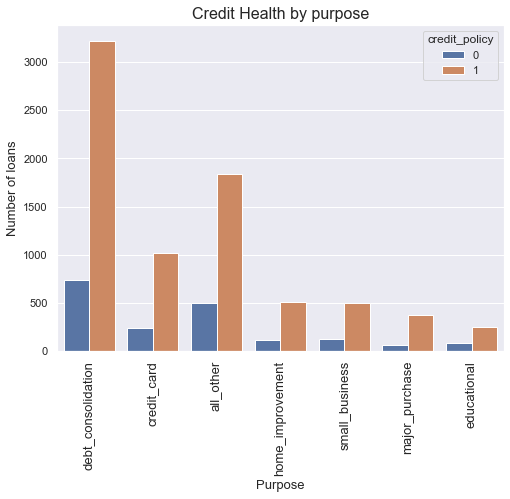

In [28]:
fig = plt.figure(figsize = (8,6))
ax1 = plt.subplot(1,1,1)

sns.countplot(x = "purpose", hue = "credit_policy", data = loan_data)
plt.xticks(rotation = 90, fontsize = 13)
plt.title("Credit Health by purpose", fontsize = 16)
plt.xlabel("Purpose", fontsize = 13)
plt.ylabel("Number of loans", fontsize = 13)

plt.show()


In [36]:
#calculating risky/total countof loans by purpose
tot_count_0f_loans_by_purpose = loan_data.groupby(['purpose'])['credit_policy'].count().reset_index()
tot_count_of_risky_loans_by_purpose = loan_data[loan_data['credit_policy']==0].groupby(['purpose'])['credit_policy'].count().reset_index()

risky_to_total_ratio_by_purpose = pd.merge(tot_count_of_risky_loans_by_purpose,tot_count_0f_loans_by_purpose, on = 'purpose', suffixes = ('_x','_y'))
risky_to_total_ratio_by_purpose

,purpose,credit_policy_x,credit_policy_y
0,all_other,496,2331
1,credit_card,242,1262
2,debt_consolidation,734,3957
3,educational,89,343
4,home_improvement,117,629
5,major_purchase,66,437
6,small_business,124,619


In [38]:
risky_to_total_ratio_by_purpose.columns = ["purpose", "Risky","Total"]
risky_to_total_ratio_by_purpose

,purpose,Risky,Total
0,all_other,496,2331
1,credit_card,242,1262
2,debt_consolidation,734,3957
3,educational,89,343
4,home_improvement,117,629
5,major_purchase,66,437
6,small_business,124,619


In [41]:
risky_to_total_ratio_by_purpose["ratio"] = risky_to_total_ratio_by_purpose["Risky"]/risky_to_total_ratio_by_purpose["Total"]*100
risky_to_total_ratio_by_purpose.sort_values('ratio', ascending=False)

,purpose,Risky,Total,ratio
3,educational,89,343,25.947522
0,all_other,496,2331,21.278421
6,small_business,124,619,20.032310
1,credit_card,242,1262,19.175911
4,home_improvement,117,629,18.600954
2,debt_consolidation,734,3957,18.549406
5,major_purchase,66,437,15.102975


From the above observation around 26% of the Education purpose loans are termed "Risky" followed by all_other and small_business purposes.

### Interest Rate

In [46]:
loan_data.groupby('credit_policy').agg({'int_rate':['min','max','mean']})

int_rate                  
                   min     max      mean
credit_policy                           
0                 0.06  0.2164  0.138680
1                 0.06  0.2121  0.118754

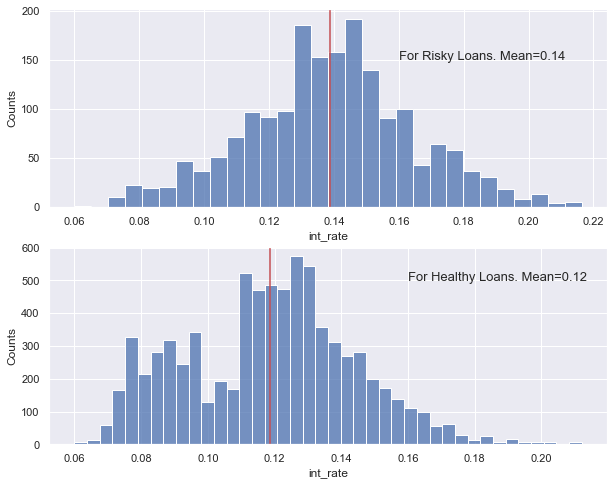

In [49]:
fig = plt.figure(figsize = (10,8))

ax1 = plt.subplot(211)

sns.histplot(loan_data[loan_data["credit_policy"]==0]["int_rate"], kde = False)
plt.axvline(x = loan_data[loan_data["credit_policy"]==0]["int_rate"].mean(), color = 'r') # Mean line
#plt.axvline(x = loan_data[loan_data["credit_policy"]==0]["int_rate"].median(), color = 'b') # median line
plt.ylabel("Counts")
plt.text(0.16,150,"For Risky Loans. Mean={}".format(round(loan_data[loan_data["credit_policy"]==0]["int_rate"].mean(),2)), fontsize =13)


ax2 = plt.subplot(212)
sns.histplot(loan_data[loan_data["credit_policy"]==1]["int_rate"], kde = False)
plt.axvline(x = loan_data[loan_data["credit_policy"]==1]["int_rate"].mean(), color = 'r') # Mean line
#plt.axvline(x = loan_data[loan_data["credit_policy"]==0]["int_rate"].median(), color = 'b') # median line
plt.ylabel("Counts")
plt.text(0.16,500,"For Healthy Loans. Mean={}".format(round(loan_data[loan_data["credit_policy"]==1]["int_rate"].mean(),2)), fontsize =13)

plt.show()

The average interest rate for the Risky loans is around 2% higher than the healthy loans.

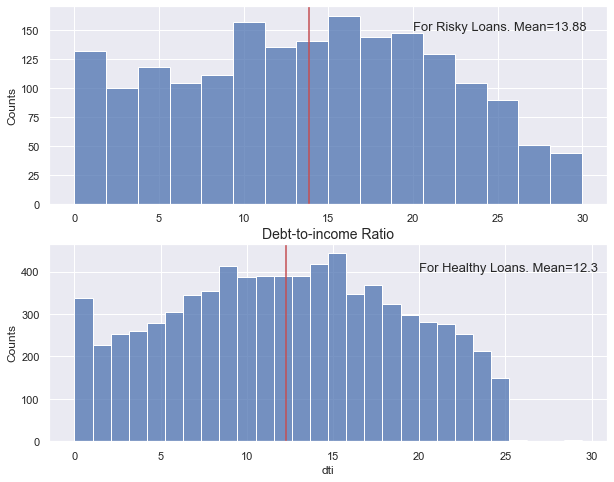

In [50]:
fig = plt.figure(figsize = (10,8))

ax1 = plt.subplot(211)

sns.histplot(loan_data[loan_data["credit_policy"]==0]["dti"], kde = False)
plt.axvline(x = loan_data[loan_data["credit_policy"]==0]["dti"].mean(), color = 'r') # Mean line
#plt.axvline(x = loan_data[loan_data["credit_policy"]==0]["int_rate"].median(), color = 'b') # median line
plt.ylabel("Counts")
plt.xlabel("Debt-to-income Ratio", fontsize = 14)
plt.text(20,150,"For Risky Loans. Mean={}".format(round(loan_data[loan_data["credit_policy"]==0]["dti"].mean(),2)), fontsize =13)


ax2 = plt.subplot(212)
sns.histplot(loan_data[loan_data["credit_policy"]==1]["dti"], kde = False)
plt.axvline(x = loan_data[loan_data["credit_policy"]==1]["dti"].mean(), color = 'r') # Mean line
#plt.axvline(x = loan_data[loan_data["credit_policy"]==0]["int_rate"].median(), color = 'b') # median line
plt.ylabel("Counts")
plt.text(20,400,"For Healthy Loans. Mean={}".format(round(loan_data[loan_data["credit_policy"]==1]["dti"].mean(),2)), fontsize =13)

plt.show()

The Debt to Income ratio is higher for the Risky loans. We can also check the DTI ratio for the debt_consolidation loans to assess the risk apetite

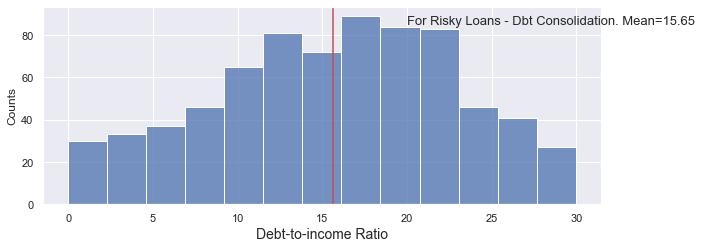

In [51]:
fig = plt.figure(figsize = (10,8))

ax1 = plt.subplot(211)

sns.histplot(loan_data[(loan_data["credit_policy"]==0) & (loan_data["purpose"]=="debt_consolidation")]["dti"], kde = False)
plt.axvline(x = loan_data[(loan_data["credit_policy"]==0) & (loan_data["purpose"]=="debt_consolidation")]["dti"].mean(), color = 'r') # Mean line
#plt.axvline(x = loan_data[loan_data["credit_policy"]==0]["int_rate"].median(), color = 'b') # median line
plt.ylabel("Counts")
plt.xlabel("Debt-to-income Ratio", fontsize = 14)
plt.text(20,85,"For Risky Loans - Dbt Consolidation. Mean={}".format(round(loan_data[(loan_data["credit_policy"]==0) & (loan_data["purpose"]=="debt_consolidation")]["dti"].mean(),2)), fontsize =13)
plt.show()

In [53]:
mean_dti_by_purpose_policy= loan_data.groupby(["purpose","credit_policy"])["dti"].mean().reset_index()
mean_dti_by_purpose_policy.sort_values('dti', ascending=False)

,purpose,credit_policy,dti
4,debt_consolidation,0,15.654455
2,credit_card,0,15.350620
3,credit_card,1,13.802539
5,debt_consolidation,1,13.717093
8,home_improvement,0,13.008889
12,small_business,0,12.485323
0,all_other,0,12.036190
7,educational,1,11.380630
6,educational,0,11.243034
1,all_other,1,10.820905


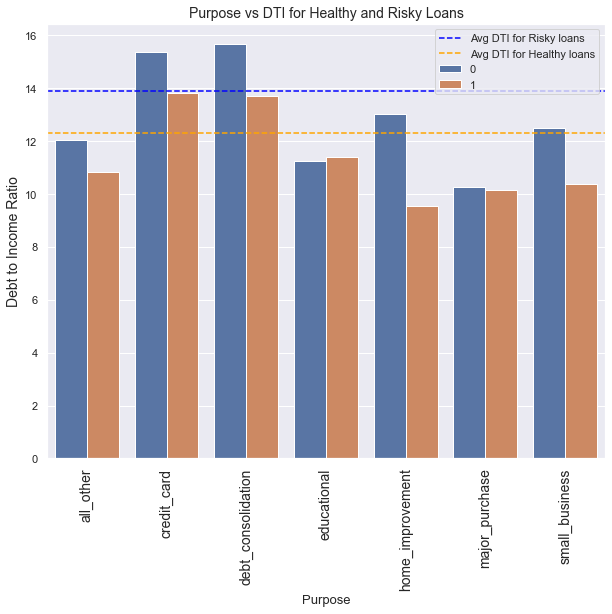

In [54]:
fig = plt.figure(figsize = (10,8))
ax1 = plt.subplot(1,1,1)

sns.barplot(data = mean_dti_by_purpose_policy,x ="purpose" , y="dti", hue = "credit_policy")
plt.xticks(rotation = 90, fontsize = 14)
plt.ylabel("Debt to Income Ratio", fontsize = 14)
plt.xlabel("Purpose", fontsize = 13)
plt.title("Purpose vs DTI for Healthy and Risky Loans", fontsize = 14)

ax2 = ax2.twinx().twiny()
plt.axhline(y = loan_data[loan_data["credit_policy"]==0]["dti"].mean(), color = 'blue', linestyle = '--', label = "Avg DTI for Risky loans")
plt.axhline(y = loan_data[loan_data["credit_policy"]==1]["dti"].mean(), color = 'orange', linestyle = '--', label = "Avg DTI for Healthy loans")
plt.legend(loc = 1)
plt.show()

Higher the DTI ratio, higher the chances of risk. The average DTI for a healthy loan is ~12.5. However, DTI with values as low as 10.5 can also be risky. Though it does not imply that the credit policy is corelated to the DTI.

It will be interesting to check the variables that are correlated to DTI.

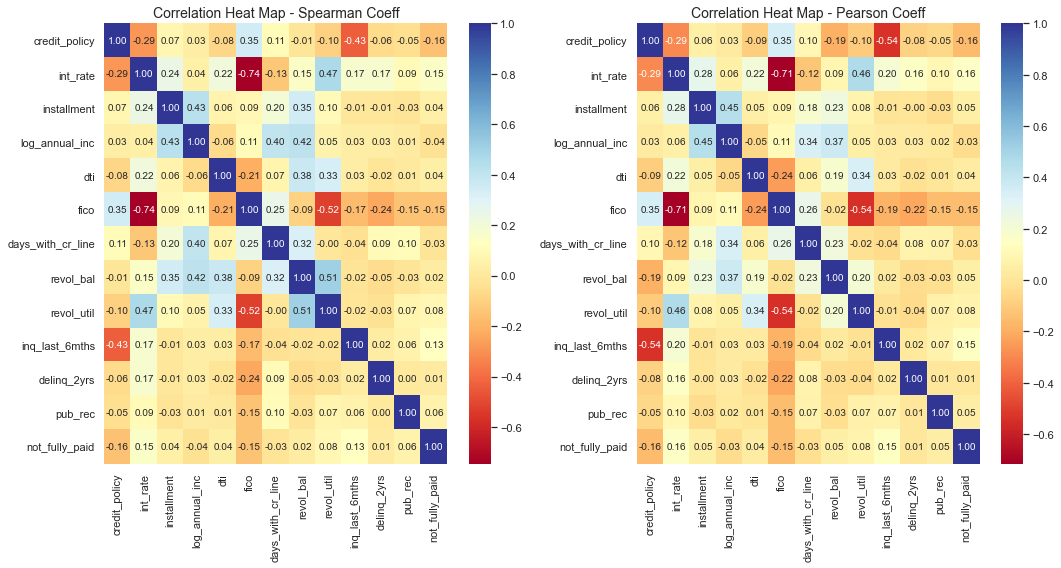

In [55]:
fig = plt.figure(figsize = (15,8))
ax1 = plt.subplot(121)
sns.heatmap(loan_data.corr('spearman'), annot = True, fmt = ".2f", cmap = "RdYlBu")
plt.title("Correlation Heat Map - Spearman Coeff", fontsize = 14)

ax2 = plt.subplot(122)
sns.heatmap(loan_data.corr('pearson'), annot = True, fmt = ".2f", cmap = "RdYlBu")
plt.title("Correlation Heat Map - Pearson Coeff", fontsize = 14)
plt.tight_layout()
plt.show()

The DTI is correlated with Revolving Balance and Revolving utilization of the credit amount(using Spearman correlation). However, DTI is onlu correlated to Revolving Utiliization with Pearson corelation coefficient.

It will be better to determine the correct corelation alogithm to apply but looking the variation of DTI and Revol_Bal and Revol_util in a scatter plot.

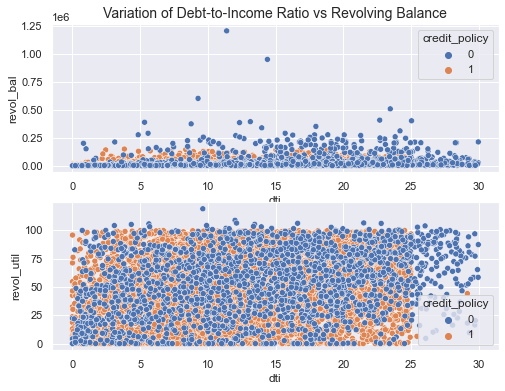

In [56]:
fig = plt.figure(figsize=(8,6))
ax1 = plt.subplot(211)

plt.title("Variation of Debt-to-Income Ratio vs Revolving Balance", fontsize = 14)
sns.scatterplot(data = loan_data[["dti", "revol_bal", "revol_util","credit_policy"]], x = "dti", y = "revol_bal", hue = "credit_policy")

ax1 = plt.subplot(212)
sns.scatterplot(data = loan_data[["dti", "revol_bal", "revol_util","credit_policy"]], x = "dti", y = "revol_util", hue = "credit_policy")


plt.show()

There appears to be no corelation between DTI and Revolving Balance/Utilization. However, from the correlation coeff, it appears that the fico - Credit Scope and the interest rates are negatively correlated.

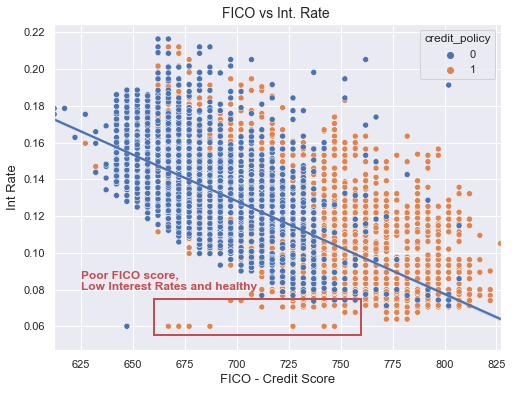

In [57]:
from matplotlib import patches
fig = plt.figure(figsize = (8,6))
ax1 = plt.subplot(111)

sns.scatterplot(data = loan_data[["fico", "int_rate","credit_policy"]], x = "fico", y = "int_rate", color = 'b', hue = "credit_policy")
sns.regplot(data = loan_data[["fico", "int_rate"]], x = "fico", y = "int_rate", color = 'b', scatter = False)
plt.title("FICO vs Int. Rate ", fontsize = 14)
plt.ylabel("Int Rate", fontsize = 13)
plt.xlabel("FICO - Credit Score", fontsize = 13)
rect = patches.Rectangle((660,0.055),100,0.02,edgecolor = "r", fill = False, linewidth = 2)
ax1.add_patch(rect)
plt.text(625,0.08,"Poor FICO score,\nLow Interest Rates and healthy", fontsize = 12, color = "r", fontweight = "semibold", )
plt.show()

The higher the FICO score, the lower the interest rates. Also, the higher credit score have better risk credibility. However, there are a few cases where lower interest rates were offered even though the FICO score was very poor. One possibility is if there hase been a compromise to adhere to the policy of loan disbursement and favours been granted.

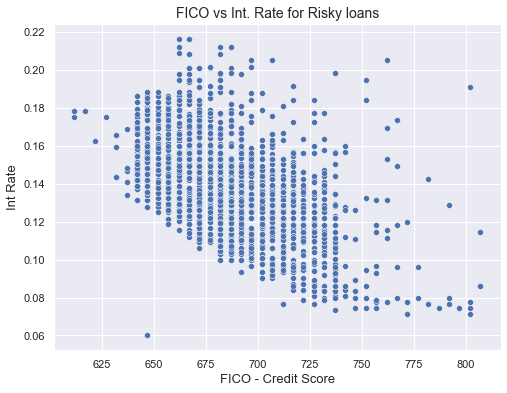

In [58]:
from matplotlib import patches
fig = plt.figure(figsize = (8,6))
ax1 = plt.subplot(111)

sns.scatterplot(data = loan_data[loan_data["credit_policy"]==0], x = "fico", y = "int_rate", color = 'b')
#sns.regplot(data = loan_data[loan_data["credit_policy"]==0], x = "fico", y = "int_rate", color = 'b', scatter = False)
plt.title("FICO vs Int. Rate for Risky loans", fontsize = 14)
plt.ylabel("Int Rate", fontsize = 13)
plt.xlabel("FICO - Credit Score", fontsize = 13)
#rect = patches.Rectangle((660,0.055),100,0.02,edgecolor = "r", fill = False, linewidth = 2)
#ax1.add_patch(rect)
#plt.text(625,0.08,"Poor FICO score,\nLow Interest Rates and healthy", fontsize = 12, color = "r", fontweight = "semibold", )
plt.show()

Identifying the loans that are termed "Healthy" in spite of having a low Credit Score and very low interest rates.

### Checking the correlation between Credit Policy and the Days with Credit LIne

In [60]:
loan_data[["credit_policy", "days_with_cr_line"]].groupby("credit_policy").mean()

,days_with_cr_line
credit_policy,
0,4058.456304
1,4682.468461


We will convert the days of credit line to years to see if the short term loans are Safer than the Longer term loans.

In [61]:
df_cr_line_policy = loan_data.loc[:,("credit_policy", "days_with_cr_line")]
df_cr_line_policy["cr line duration in years"] = np.round(df_cr_line_policy["days_with_cr_line"].apply(lambda x: x/365.25),2)
df_cr_line_policy.head()

,credit_policy,days_with_cr_line,cr line duration in years
0,1,5639.958333,15.44
1,1,2760.000000,7.56
2,1,4710.000000,12.90
3,1,2699.958333,7.39
4,1,4066.000000,11.13


In [62]:
#Let's group the years in short term, medium term, long term and very long term loans
def duration_type(y):
    if (0<=y) & (y<=3) :
        return "Short Term"
    elif (4<=y) & (y<=10):
        return "Medium Term"
    elif (11<=y) & (y<=20):
        return "Long Term"
    elif y>=21:
        return "Very Long Term"

df_cr_line_policy["Duration_Type"] = df_cr_line_policy["cr line duration in years"].apply(lambda x : duration_type(x))
df_cr_line_policy.sort_values(["cr line duration in years"])

,credit_policy,days_with_cr_line,cr line duration in years,Duration_Type
8156,0,180.041667,0.49,Short Term
8184,0,180.041667,0.49,Short Term
8223,0,180.041667,0.49,Short Term
7759,0,178.958333,0.49,Short Term
8207,0,183.041667,0.50,Short Term
...,...,...,...,...
8531,0,16260.000000,44.52,Very Long Term
6014,1,16350.000000,44.76,Very Long Term
5801,1,16652.000000,45.59,Very Long Term
7553,1,17616.000000,48.23,Very Long Term


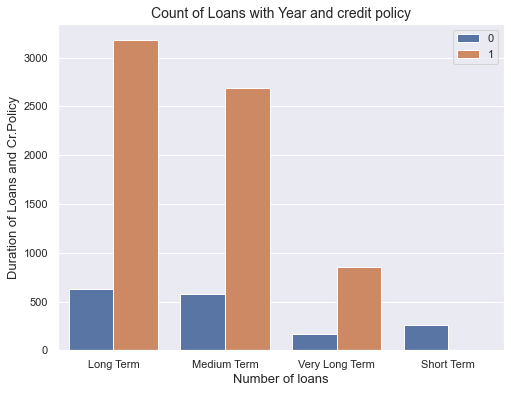

In [63]:
plt.figure(figsize = (8,6))
ax1 = plt.subplot(111)

sns.countplot(data =df_cr_line_policy, x = "Duration_Type", hue = "credit_policy" )

plt.title("Count of Loans with Year and credit policy", fontsize = 14)
plt.xlabel("Number of loans", fontsize = 13)
plt.ylabel("Duration of Loans and Cr.Policy", fontsize = 13)
plt.legend(loc  = 1)
plt.show()

From the above chart, it is very evident that the long duration loans are less riskier than the short termed loans. However, very long terms loans are also little riskier compared to medium and long term loans.

### From the correlation matrix in the heat map

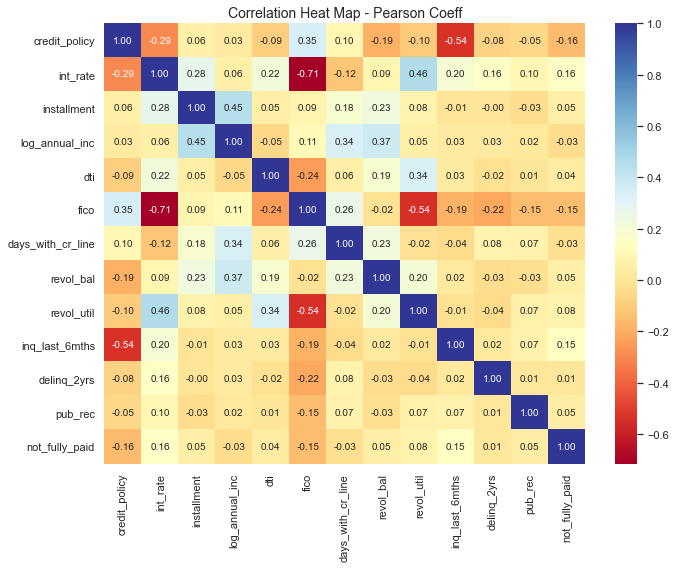

In [64]:
fig = plt.figure(figsize = (10,8))
ax2 = plt.subplot(111)
sns.heatmap(loan_data.corr('pearson'), annot = True, fmt = ".2f", cmap = "RdYlBu")
plt.title("Correlation Heat Map - Pearson Coeff", fontsize = 14)
plt.tight_layout()
plt.show()

The credit policy is a little negatively correlated with the inquiries made in the last 6 months. Let's us verify this with a scatter plot

In [65]:
loan_data["credit_policy"].map({0:"Risky", 1:"Healthy"}).head()

0    Healthy
1    Healthy
2    Healthy
3    Healthy
4    Healthy
Name: credit_policy, dtype: object

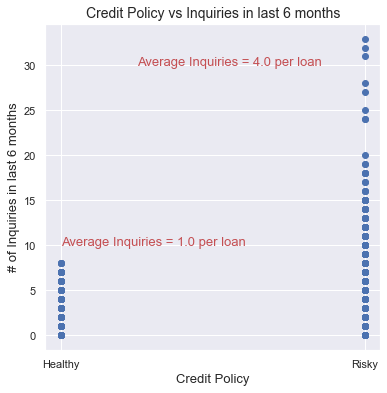

In [66]:
plt.figure(figsize=(6,6))
ax = plt.subplot(111)
plt.scatter( x=loan_data["credit_policy"].map({0:"Risky", 1:"Healthy"}), y = loan_data["inq_last_6mths"], color = "b")
plt.title("Credit Policy vs Inquiries in last 6 months", fontsize = 14)
plt.xlabel("Credit Policy", fontsize = 13)
plt.ylabel("# of Inquiries in last 6 months", fontsize = 13)
plt.text(0,10,"Average Inquiries = {} per loan".format(np.round(loan_data[loan_data["credit_policy"]==1]["inq_last_6mths"].mean(),0)), fontsize = 13, color = "r")
plt.text(0.25,30,"Average Inquiries = {} per loan".format(np.round(loan_data[loan_data["credit_policy"]==0]["inq_last_6mths"].mean(),0)), fontsize = 13, color = "r")
plt.show()

It is very evident that if the number of inquiries are more, than the loan will be classifed as Risky. FOr healthy loans, very few inquiries(<1 per loan) are made. Whereas, for risky loans, the average inquires are around 4 per loan.

This happens when the customer applies for a loan in multiple banks to get a quote of interst rates for comaprision and usually this approach works against the loan application.

## One Hot Encoding

In [69]:
#Transform categorical values into numerical values
loan_data = pd.get_dummies(loan_data, columns = ["purpose"])
loan_data.head()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [71]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit_policy               9578 non-null   int64  
 1   int_rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log_annual_inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days_with_cr_line           9578 non-null   float64
 7   revol_bal                   9578 non-null   int64  
 8   revol_util                  9578 non-null   float64
 9   inq_last_6mths              9578 non-null   int64  
 10  delinq_2yrs                 9578 non-null   int64  
 11  pub_rec                     9578 non-null   int64  
 12  not_fully_paid              9578 non-null   int64  
 13  purpose_all_other           9578 

In [70]:
loan_data.describe()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054,0.243370,0.131760,0.413134,0.035811,0.065671,0.045625,0.064627
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676,0.429139,0.338248,0.492422,0.185829,0.247720,0.208682,0.245880
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
loan_data.corr()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
credit_policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119,-0.025412,0.003216,0.020193,-0.031346,0.006036,0.024281,-0.003511
int_rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552,-0.124000,-0.042109,0.123607,-0.019618,-0.050697,-0.068978,0.151247
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955,-0.203103,0.000774,0.161658,-0.094510,0.023024,-0.079836,0.145654
log_annual_inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439,-0.080077,0.072942,-0.026214,-0.119799,0.116375,-0.031020,0.091540
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362,-0.125825,0.084476,0.179149,-0.035325,-0.092788,-0.077719,-0.069245
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666,0.067184,-0.012512,-0.154132,-0.013012,0.097474,0.067129,0.063292
days_with_cr_line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237,-0.056574,0.046220,-0.009318,-0.042621,0.068087,-0.020561,0.034883
revol_bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699,-0.067728,0.072316,0.005785,-0.034743,0.003258,-0.062395,0.083069
revol_util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088,-0.138535,0.091321,0.211869,-0.053128,-0.114449,-0.108079,-0.060962
inq_last_6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452,0.017795,-0.033640,-0.044240,0.024243,0.043827,-0.001445,0.042567


### Corelation Heatmap before splitting

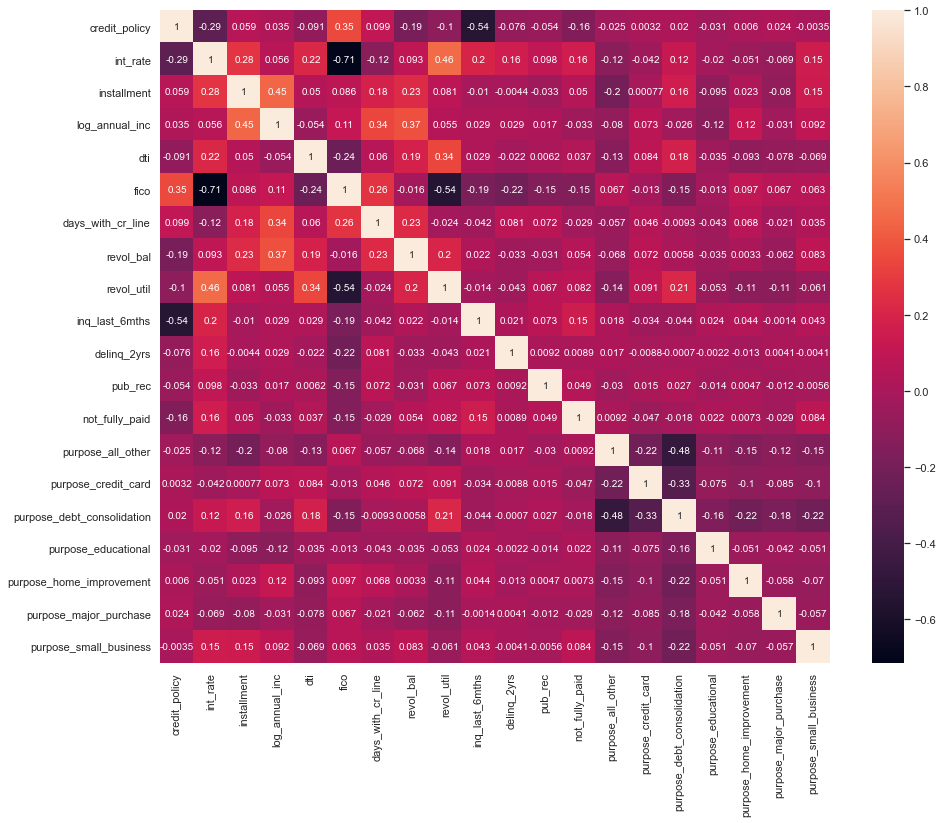

In [73]:
plt.figure(figsize = (15,12))
sns.heatmap(data = loan_data.corr(), annot = True)
plt.show()

### Splitting The Data

In [76]:
X = loan_data.drop("not_fully_paid", axis = 1)
y = loan_data["not_fully_paid"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =
0.3, random_state = 4)

### Corelation Heatmap after data split

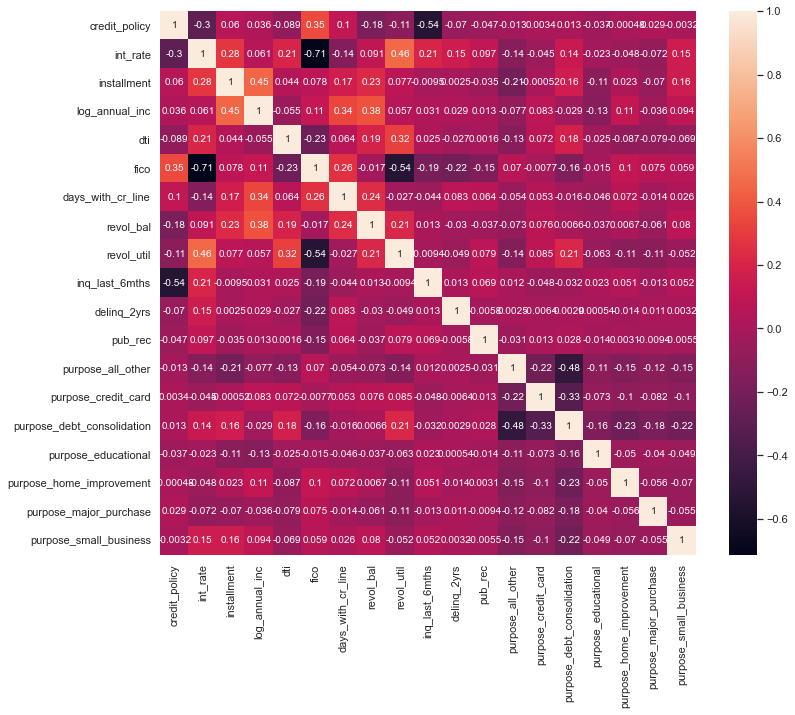

In [78]:
plt.figure(figsize = (12,10))
sns.heatmap(data = X_train.corr(), annot = True)
plt.show()

From the correlation heatmaps we can observe that no two features have positive corelation of more than 0.7 , so we will not remove any feature.

### Feature Scaling

In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape , X_test.shape)

(6704, 19) (2874, 19)


### Building Deep Learning Model and Defining Model architecture

In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [81]:
model = Sequential()

model.add(Dense(units = 128, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2, seed = 123))

model.add(Dense(units = 64, activation = 'tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.2, seed = 123))

model.add(Dense(units = 32, activation = 'relu'))          
model.add(BatchNormalization())
model.add(Dropout(0.2, seed = 123))

model.add(Dense(units = 1, activation = 'sigmoid'))

In [82]:
es = EarlyStopping(monitor = "accuracy", patience = 4)

In [83]:
model.compile(optimizer = Adam(learning_rate = 0.01),
 loss = 'binary_crossentropy',
 metrics = ['accuracy'])

In [84]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2560      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

### Model Training

In [85]:
result = model.fit(X_train, y_train,
 validation_data = (X_test, y_test),
 callbacks = [es],
 epochs = 100)

Epoch 1/100
210/210 [==============================] - 2s 4ms/step - loss: 0.4650 - accuracy: 0.8122 - val_loss: 0.4123 - val_accuracy: 0.8431
Epoch 2/100
210/210 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.8341 - val_loss: 0.4062 - val_accuracy: 0.8497
Epoch 3/100
210/210 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.8355 - val_loss: 0.4044 - val_accuracy: 0.8497
Epoch 4/100
210/210 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8356 - val_loss: 0.4016 - val_accuracy: 0.8497
Epoch 5/100
210/210 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.8358 - val_loss: 0.4006 - val_accuracy: 0.8476
Epoch 6/100
210/210 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.8353 - val_loss: 0.3997 - val_accuracy: 0.8497
Epoch 7/100
210/210 [==============================] - 0s 2ms/step - loss: 0.4179 - accuracy: 0.8352 - val_loss: 0.3996 - val_accuracy: 0.8497

In [86]:
y_pred = model.predict(X_test) >=0.5

### Model Testing

In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_pred, y_test)

0.8493389004871259

In [88]:
confusion_matrix(y_pred, y_test)

array([[2441,  432],
       [   1,    0]], dtype=int64)

### Hyperparameter Tunning

In [89]:
!pip install -q -U keras-tuner

In [91]:
# Defining limits of parameters for tuning
def build_model(hp):
 model = Sequential()

 model.add(Dense(units = hp.Int('units', min_value = 32, max_value = 1024, step = 16),
                                 activation = hp.Choice('actiivation',['relu','tanh']),
                                 input_shape = (X_train.shape[1],)))
 model.add(BatchNormalization())
 model.add(Dropout(hp.Float('rate', min_value = 0.1, max_value = 0.4, step = 0.1), seed = 1234))

 model.add(Dense(units = hp.Int("units", min_value = 32, max_value = 128, step = 16),
                                 activation = hp.Choice("activation", ["relu","tanh"])))
 model.add(BatchNormalization())
 model.add(Dropout(hp.Float("rate",min_value = 0.1, max_value = 0.4, step = 0.1), seed = 1234))

 model.add(Dense(units = hp.Int("units", min_value = 32, max_value = 64, step = 16),
                                 activation = hp.Choice("activation", ["relu","tanh"])))
 model.add(BatchNormalization())
 model.add(Dropout(hp.Float("rate",min_value = 0.1, max_value = 0.4, step = 0.1), seed = 1234))
    
 model.add(Dense(units = 1, activation = "sigmoid"))

 learning_rate = hp.Float("learning_rate", min_value = 0.001, max_value = 0.1, step = 0.01)
 
 model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate),
               loss = "binary_crossentropy",
               metrics = ["accuracy"])
 
 return model


In [92]:
import keras_tuner as kt
build_model(kt.HyperParameters())

In [93]:
# Settling rules for tuning
rtuner = kt.RandomSearch(hypermodel = build_model,
 objective='val_accuracy',
 max_trials=3,
 executions_per_trial=2,
 overwrite=True,
 directory='my_dir',
 project_name='diab')

In [94]:
# Tuning the parameters
rtuner.search(X_train, y_train, epochs=2, validation_data=(X_test,
y_test))

Trial 3 Complete [00h 00m 19s]
val_accuracy: 0.8484690487384796

Best val_accuracy So Far: 0.849860817193985
Total elapsed time: 00h 00m 39s
INFO:tensorflow:Oracle triggered exit


In [98]:
# Chosing any one model, there are two model created namely models[0] and model[1]
models = rtuner.get_best_models(num_models=2)
models[1].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                960       
                                                                 
 batch_normalization (BatchN  (None, 48)               192       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 48)                0         
                                                                 
 dense_1 (Dense)             (None, 48)                2352      
                                                                 
 batch_normalization_1 (Batc  (None, 48)               192       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 48)                0

In [99]:
y_predh = models[1].predict(X_test) >=0.5
accuracy_score(y_predh, y_test)

0.8496868475991649